# **Cancer Clinical Trial qualification prediction**

**The aim of this project is to predict whether the patient is qualified for the cancer clinical trial or not given the condition. The corresponding study intervention suggests the required treatment for the particular subject.**

# Business Use Case:

**Clinical trial are research studies performed on people to find out if a new drug, treatment is safe and effective on people. There are various challenges that they face like entering and transferring data, correct dosage etc. To improve these trails, researchers are moving towards AI and NLP to smoothen the process.**

**NLP when applied to the field of medicine has the potential to go through the doctors' notes i.e. unstructured data and extract meaningful information from it in less time.**

**Let us see the steps followed in this project:-**

1. Import the libraries
2. Exploratory Data analysis (number of classes, NAN values, types of cancer and corresponding study etc.)
3. Text data preprocessing on condition column
4. Feature Extraction (words to one hot vectors and pass to Embedding layer)
5. Build LSTM model and passing embedded vectors in it.
6. Performace analysis using metrics

# A] Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('../input/clinical-trial/cancer_clinical_trials.csv')
df.head()

,study,condition,qualification
0,study interventions are recombinant CD40-ligand,melanoma skin diagnosis and no active cns met...,0
1,study interventions are Liposomal doxorubicin,colorectal cancer diagnosis and cardiovascular,0
2,study interventions are BI 836909,multiple myeloma diagnosis and indwelling cen...,0
3,study interventions are Immunoglobulins,recurrent fallopian tube carcinoma diagnosis ...,0
4,study interventions are Paclitaxel,stage ovarian cancer diagnosis and patients m...,0


In [3]:
df.shape

(1000000, 3)

In [4]:
df.dtypes


study            object
condition        object
qualification     int64
dtype: object

<AxesSubplot:>

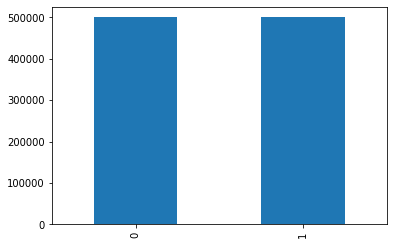

In [5]:
df['qualification'].value_counts().plot.bar()   #balanced dataset

In [6]:
#check for NAN values

features_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
features_with_nan    #no nulll values

[]

# Independent and dependent variables

In [7]:
X=df['condition']
y=df['qualification']

In [8]:
#declaring the vocab size : It will contain all the unique the words from the condition column

voc_size=5000
messages=X.copy()

# Data Preprocessing : Process like removal of stopwords,stemming/Lemmatization,removal of  punctuations, upper cases to lower and storing in corpus variable.

**We will use NLTK library for this. Stemming is the process of reducing the form of words to its base form. It helps in bringing uniformity in the corpus. PorterStemmer helps in doing this.**

In [9]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

# Feature extraction

**There are various techniques for feature extraction(convert word to vectors) like bag of words, tf-idf and embeddings. We will work on embedding layer here as it focuses better on semantic information and the size of vectors is less as embeddings lead to formation of dense matrix instead of sparse matrix(more 0's)**

**#now we convert each word into corpus into one hot vectors where each word is assigned a number(index) based on vocabulary size(5000) declared earlier. Now we pass those vectors to the embedding layer**

In [10]:
onehot_repr=[one_hot(words,voc_size) for words in corpus]
onehot_repr

[[1610, 3623, 4250, 95, 2127, 4322, 687, 3988, 796],
 [2119, 4190, 4250, 2332],
 [3767,
  1746,
  4250,
  3280,
  2353,
  655,
  3025,
  2851,
  3120,
  1393,
  655,
  2353,
  1681,
  164],
 [3648,
  210,
  594,
  4111,
  4250,
  2775,
  1130,
  3859,
  1181,
  3859,
  3555,
  4678,
  4678,
  3382,
  700,
  3648,
  4679,
  1419,
  1858,
  1976,
  2127,
  1976,
  4728,
  3382],
 [245, 2862, 4190, 4250, 2775, 343, 2142, 540, 3929, 2999, 675, 2904],
 [3648, 1933, 4111, 4304, 4085, 4250, 343, 4883, 675, 960, 588, 4334],
 [3481,
  4190,
  4250,
  4356,
  4233,
  4507,
  3387,
  3938,
  111,
  2860,
  1557,
  3387,
  111,
  1284,
  3938,
  111,
  687,
  4345,
  3874,
  4356,
  796,
  1227,
  1976,
  3574,
  3431,
  392,
  3553,
  4177,
  3553,
  1271,
  3553],
 [1148, 4818, 3957, 1459, 4250, 658, 4334],
 [2142,
  3792,
  1371,
  588,
  4334,
  4634,
  677,
  2426,
  4195,
  3792,
  3128,
  4212,
  3756,
  3926,
  4190,
  2551,
  2586,
  2242,
  2267,
  3774,
  2352,
  1312,
  3312,
  4565,
 

**In word embedding we will convert the words into vectors based on features.It is a featurized representation of the words where similar words will be represented by almost equal vector for a particular feature.That is why Feature representation is useful as it helps in capturing semantic information and it also reduces into a dense matrix and low dimension unlike Bag of words/TF-IDF representation where it is sparse matrix and high dimension.**

**Before passing One Hot representation to the embedding layer , we need to make sure that all the length of the sentences are equal . If it is not the same , we apply pre padding with zeroes to make the lengths equal by first defining a sentence length.**

In [11]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [12]:
print(embedded_docs)

[[   0    0    0 ...  687 3988  796]
 [   0    0    0 ... 4190 4250 2332]
 [   0    0    0 ... 2353 1681  164]
 ...
 [   0    0    0 ... 2699 3592 1835]
 [   0    0    0 ... 2816 1375 4683]
 [   0    0    0 ...  588 3111 2300]]


# Model Building LSTM

In [13]:
from tensorflow.keras.layers import Dropout
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-04-17 14:15:57.603207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-17 14:15:57.687669: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-17 14:15:57.688412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-17 14:15:57.689623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
import numpy as np

X_final=np.array(embedded_docs)
y_final=np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [16]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

2022-04-17 14:16:01.184221: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-04-17 14:16:03.373064: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


10469/10469 [==============================] - 63s 6ms/step - loss: 0.3765 - accuracy: 0.8369 - val_loss: 0.3125 - val_accuracy: 0.8690
Epoch 2/10
10469/10469 [==============================] - 60s 6ms/step - loss: 0.3142 - accuracy: 0.8682 - val_loss: 0.2828 - val_accuracy: 0.8819
Epoch 3/10
10469/10469 [==============================] - 59s 6ms/step - loss: 0.2911 - accuracy: 0.8790 - val_loss: 0.2670 - val_accuracy: 0.8890
Epoch 4/10
10469/10469 [==============================] - 60s 6ms/step - loss: 0.2770 - accuracy: 0.8850 - val_loss: 0.2549 - val_accuracy: 0.8944
Epoch 5/10
10469/10469 [==============================] - 59s 6ms/step - loss: 0.2665 - accuracy: 0.8902 - val_loss: 0.2473 - val_accuracy: 0.8981
Epoch 6/10
10469/10469 [==============================] - 71s 7ms/step - loss: 0.2589 - accuracy: 0.8933 - val_loss: 0.2401 - val_accuracy: 0.9016
Epoch 7/10
10469/10469 [==============================] - 61s 6ms/step - loss: 0.2535 - accuracy: 0.8958 - val_loss: 0.2385 - val

# Performance Metrics

**In healthcare industries,choosing the right performance metric to evaluate the model is very crucial. In healthcare problems, the dataset is usually imbalanced so accuracy metric is not reliable as it is gets biased towards the class which has more occurences. Therefore, we generally use Precision, recall and f1 score in these cases.**

**We will focus more on False Positive (Precision) when it comes to clinical trial use case because if even if the prediction is positive(eligible) but actual is not eligible, that is more dangerous case.**

# Accuracy = (TP+TN)/(TP+TN+FP+FN)

**Accuracy is the ratio of total correct predictions and total number of predictions**

In [17]:
y_pred=np.argmax(model.predict(X_test), axis=-1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4997666666666667

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [20]:
print(classification_report(y_test,y_pred,digits=2))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    164923
           1       0.00      0.00      0.00    165077

    accuracy                           0.50    330000
   macro avg       0.25      0.50      0.33    330000
weighted avg       0.25      0.50      0.33    330000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
set(y_test) - set(y_pred)

{1}

**As we can see above that there is an ill behaviour with respect to label 1.This means that there is no F-score to calculate for this label, and thus the F-score for this case is considered to be 0.0. Since we are requested an average of the score, you must take into account that a score of 0 was included in the calculation, and this is why scikit-learn is showing us that warning**

# Solution :

**What we can do, is decide that if we are not interested in the scores of labels that were not predicted,then explicitly specify the labels we are interested in (which are labels that were predicted at least once).**



In [22]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[164923,      0],
       [165077,      0]])

In [23]:
from sklearn import metrics

# F1 Score : Harmonic mean of Precision and Recall

In [24]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.6664592269908652

# Recall=TP/TP+FN

In [25]:
metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

1.0

# Precision=TP/(TP+FP)

In [26]:
metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.49976666666666664